In [1]:
from pysas.wrapper import Wrapper as w

In [2]:
import os
from xspec import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Custom built Python files
from tools.plot_events import *
from tools.plotLC import *
from tools.js9helper import *

In [3]:
home = os.path.expanduser('~') # Expands '~' to the absolute path of the user's home directory, useful for managing file paths

print("Home directory: "+home+"\n") 

Home directory: /home/uverma



In [4]:
ccf_paths = ['/data/user/pub', '/data/pub']

In [5]:
for user_ccfpath in ccf_paths:
    ccf_path = f'{home}{user_ccfpath}'
    if os.path.isdir(ccf_path):
        os.environ['SAS_CCFPATH'] = ccf_path
        print("Path to the XMM-Newton CCFs: " + ccf_path + "\n")
        break
else:
    raise FileNotFoundError("Cannot locate the specified CCF paths, please check your data volume.")

Path to the XMM-Newton CCFs: /home/uverma/data/pub



In [6]:
inargs=[]

In [11]:
t=w('sasver',inargs)

In [12]:
t.run()


    XMM-Newton SAS - release and build information

    SAS release: xmmsas_20230412_1735-21.0.0
    Compiled on: Sun Apr 16 21:03:02 CEST 2023
    Compiled by: sasbuild@sasbld01n.iuser.lan
    Platform   : Ubuntu20.04

    SAS-related environment variables set:

    
SAS_DIR        = /usr/local/SAS/xmmsas_20230412_1735
SAS_PATH       = /usr/local/SAS/xmmsas_20230412_1735
SAS_CCFPATH    = /home/uverma/data/pub


In [13]:
# Type the name of the Working directory. Lets assume it is: example_xmm_data
user_workdir=f'/ngcxmm_data'
work_dir = f'{home}{user_workdir}'

# Check if the directory exists. If not, create it. Change to the Working directory
if (os.path.isdir(work_dir)):
    os.chdir(work_dir) # Changing the current directory to working directory
else:
    os.mkdir(work_dir) # Create directory to working directory
    os.chdir(work_dir) # Changing the current directory to working directory
        
print(" Path to the Working directory: "+work_dir+"\n")    

 Path to the Working directory: /home/uverma/ngcxmm_data



In [14]:
odfid = '0112551301'

inargs = [f'odfid={odfid}']

In [15]:
w('startsas',inargs).run()

startsas - WARNING - Executing /usr/local/SAS/xmmsas_20230412_1735/lib/python/pysas/startsas/startsas.py {'odfid': '0112551301', 'workdir': 'pwd', 'sasfiles': 'no', 'sas_ccf': '', 'sas_odf': '', 'level': 'ODF', 'cifbuild_opts': '', 'odfingest_opts': ''}
INFO:startsas:LHEASOFT = /usr/local/heasoft-6.30.1/x86_64-pc-linux-gnu-libc2.31
INFO:startsas:SAS_DIR = /usr/local/SAS/xmmsas_20230412_1735
INFO:startsas:SAS_CCFPATH = /home/uverma/data/pub
INFO:startsas:startsas was initiated from /media/home/ngcxmm_data
INFO:startsas:Will download ODF with level ODF
INFO:startsas:Requesting odfid  = 0112551301 to XMM-Newton Science Archive

INFO:startsas:Downloading 0112551301, level ODF


Requesting odfid  = 0112551301 to XMM-Newton Science Archive





INFO:startsas:0112551301.tar.gz downloaded.
INFO:startsas:Creating directory 0112551301 ...
INFO:startsas:Unpacking 0112551301.tar.gz ...



Creating directory 0112551301 ...

Unpacking 0112551301.tar.gz ...



INFO:startsas:0112551301.tar.gz extracted successfully!
INFO:startsas:0112551301.tar.gz removed
INFO:startsas:Unpacking 0286_0112551301.TAR ...


Unpacking 0286_0112551301.TAR ...


INFO:startsas:0286_0112551301.TAR removed
INFO:startsas:File MANIFEST.280474 exists
INFO:startsas:Setting SAS_ODF = /media/home/ngcxmm_data/0112551301
INFO:startsas:Running cifbuild...



Setting SAS_ODF = /media/home/ngcxmm_data/0112551301

Running cifbuild...
cifbuild:- Executing (routine): cifbuild calindexset=ccf.cif ccfpath=. withccfpath=no usecanonicalname=no recurse=no fileglob=*.ccf|*.CCF fullpath=no observationdate=now withobservationdate=no analysisdate=now category=XMMCCF ignorecategory=no masterindex=no masterindexset=ccf.mif withmasterindexset=no append=no  -w 1 -V 4
cifbuild:- cifbuild (cifbuild-4.10.1)  [xmmsas_20230412_1735-21.0.0] started:  2025-04-12T04:07:21.000
cifbuild:- Will ask the analysis date to the OAL.
cifbuild:- Using the ODF 0286_0112551301 found in /media/home/ngcxmm_data/0112551301
cifbuild:- Observation date: 2001-07-02T16:20:16.000
cifbuild:- Analysis date: 2025-04-12T04:07:21.000


INFO:startsas:CIF file ccf.cif created
INFO:startsas:Setting SAS_CCF = /media/home/ngcxmm_data/ccf.cif
INFO:startsas:Running odfingest...


cifbuild:- cifbuild (cifbuild-4.10.1)  [xmmsas_20230412_1735-21.0.0] ended:    2025-04-12T04:07:50.000

Setting SAS_CCF = /media/home/ngcxmm_data/ccf.cif

Running odfingest...
odfingest:- Executing (routine): odfingest odfdir=. withodfdir=no outdir=. summaryfile=0000_0000000000_SCX000SUM.SAS usecanonicalname=yes writepath=yes findinstrumentmodes=yes usehousekeeping=yes oalcheck=no  -w 1 -V 4
odfingest:- odfingest (odfingest-3.33.1)  [xmmsas_20230412_1735-21.0.0] started:  2025-04-12T04:07:56.000
odfingest:- Looking for ODF constituents in /media/home/ngcxmm_data/0112551301/
odfingest:- Identified the following ODF
Revolution:  0286
Observation: 0112551301
Proposal:    0112551301
odfingest:- Dataset Time Range: 0286_0112551301_M1S00100AUX.FIT : 2001-07-02T16:31:56.000 - 2001-07-02T18:37:58.000
odfingest:- Dataset Time Range: 0286_0112551301_M1S00100CCX.FIT : 2001-07-02T16:31:56.000 - 2001-07-02T18:37:58.000
odfingest:- Dataset Time Range: 0286_0112551301_M1S00110IME.FIT : 2001-07-02T16:

INFO:startsas:odfingest successfully completed
INFO:startsas:SAS summary file 0286_0112551301_SCX00000SUM.SAS created
INFO:startsas:Setting SAS_ODF = /media/home/ngcxmm_data/0286_0112551301_SCX00000SUM.SAS
INFO:startsas:Summary file PATH keyword matches /media/home/ngcxmm_data/0112551301


odfingest:- odfingest (odfingest-3.33.1)  [xmmsas_20230412_1735-21.0.0] ended:    2025-04-12T04:08:07.000

Setting SAS_ODF = /media/home/ngcxmm_data/0286_0112551301_SCX00000SUM.SAS




        SAS_CCF = /media/home/ngcxmm_data/ccf.cif
        SAS_ODF = /media/home/ngcxmm_data/0286_0112551301_SCX00000SUM.SAS
        



In [16]:
!cp -r /media/home/m31/data/* /media/home/ngcxmm_data/

In [18]:
inargs = [f'sas_ccf={work_dir}/ccf.cif', f'sas_odf={work_dir}/0286_0112551301_SCX00000SUM.SAS', f'workdir={work_dir}']

w('startsas', inargs).run()

startsas - WARNING - Executing /usr/local/SAS/xmmsas_20230412_1735/lib/python/pysas/startsas/startsas.py {'odfid': '', 'workdir': '/home/uverma/ngcxmm_data', 'sasfiles': 'yes', 'sas_ccf': '/home/uverma/ngcxmm_data/ccf.cif', 'sas_odf': '/home/uverma/ngcxmm_data/0286_0112551301_SCX00000SUM.SAS', 'level': 'ODF', 'cifbuild_opts': '', 'odfingest_opts': ''}
INFO:startsas:LHEASOFT = /usr/local/heasoft-6.30.1/x86_64-pc-linux-gnu-libc2.31
INFO:startsas:SAS_DIR = /usr/local/SAS/xmmsas_20230412_1735
INFO:startsas:SAS_CCFPATH = /home/uverma/data/pub
INFO:startsas:startsas was initiated from /media/home/ngcxmm_data
INFO:startsas:Work directory = /home/uverma/ngcxmm_data
INFO:startsas:Changed directory to /home/uverma/ngcxmm_data
INFO:startsas:Will download ODF with level ODF
INFO:startsas:/home/uverma/ngcxmm_data/ccf.cif is present
INFO:startsas:/home/uverma/ngcxmm_data/0286_0112551301_SCX00000SUM.SAS is present
INFO:startsas:SAS_CCF = /home/uverma/ngcxmm_data/ccf.cif
INFO:startsas:SAS_ODF = /home/



        Starting SAS session
    
        Working directory = /home/uverma/ngcxmm_data
    
        
SAS_CCF = /home/uverma/ngcxmm_data/ccf.cif
SAS_ODF = /home/uverma/ngcxmm_data/0286_0112551301_SCX00000SUM.SAS


In [19]:
# SAS Command
cmd    = 'epproc'  # SAS task to be executed

# Arguments of SAS Command
inargs = []        # comma separated arguments for SAS task

print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   SAS command to be executed: epproc, with arguments; 



[]

In [20]:
print("Running epproc ..... \n")

# Check if epproc has already run. If it has, do not run again 
exists = 0
pnevt_list = []

# Search for EPIC-pn event list files
for root, dirs, files in os.walk("."):
    for filename in files:
        if (filename.find('EPN') != -1) and filename.endswith('ImagingEvts.ds'):
            pnevt_list.append(filename)
            exists = 1
            
# If EPIC-pn event list files are found, indicate that epproc has already run
if exists:
    print(" > " + str(len(pnevt_list)) + " EPIC-pn event list found. Not running epproc again.\n")
    for x in pnevt_list:
        print("    " + x + "\n")
    print("..... OK")
else:
    w(cmd,inargs).run()      # <<<<< Execute SAS task
    exists = 0
    pnevt_list = []
    
    # Search for EPIC-pn event list files again after running epproc
    for root, dirs, files in os.walk("."):
        for filename in files:
            if (filename.find('EPN') != -1) and filename.endswith('ImagingEvts.ds'):
                pnevt_list.append(filename)
                exists = 1
    # If EPIC-pn event list files are found after running epproc, print their count and names
    if exists:
        print(" > " + str(len(pnevt_list)) + " EPIC-pn event list found after running epproc.\n")
        for x in pnevt_list:
            print("    " + x + "\n")
        print("..... OK")
    else:
        # If EPIC-pn event list files are not found after running epproc, indicate an error
        print("Something has gone wrong with epproc. I cant find any event list files after running. \n")

Running epproc ..... 

Executing: 
epproc withdefaultcal='yes' removetemporaries='yes' removeintermediategtis='yes' removeintermediateeventlists='yes' pileuptempfile='no' selectccds='no' ccd1='no' ccd2='no' ccd3='no' ccd4='no' ccd5='no' ccd6='no' ccd7='no' ccd8='no' ccd9='no' ccd10='no' ccd11='no' ccd12='no' selectmodes='yes' imaging='yes' timing='yes' burst='no' timingsrcposition='190' withinstexpids='no' instexpids='' withgtiset='no' gtiset='gti.ds' runhkgtigen='yes' runatthkgen='yes' referencepointing='median' ra='0' dec='0' posangle='0' filterevents='yes' filterexpression='(PI > 150 && RAWY > 0)' flagfilteredevents='no' rungtimerge='no' applygti='yes' runevlistcomb='yes' othertables='EXPOSURE BADPIX STDGTI DLIMAP HKAUX' runepexposure='yes' randomizetime='yes' spatialexposure='yes' deleteexposurecolumns='yes' searchforbadpixels='yes' searchforbadcolumns='yes' thresholdlabel='rate' lothresh='0' hithresh='0.0045' columnsearchlabel='median' locolthresh='0' hicolthresh='0.00105' flicker

In [39]:
pn_pattern   = 4        # pattern selection
pn_pi_min    = 300.     # Low energy range eV
pn_pi_max    = 12000.   # High energy range eV
pn_flag      = 0        # FLAG

expression = f'(PATTERN <= {pn_pattern})&&(PI in [{pn_pi_min}:{pn_pi_max}])&&#XMMEA_EP&&(FLAG == 0)'
print("Expression for display filtering: "+expression)

Expression for display filtering: (PATTERN <= 4)&&(PI in [300.0:12000.0])&&#XMMEA_EP&&(FLAG == 0)


Events in event file 0286_0112551301_EPN_S003_ImagingEvts.ds: 1052152

Events in filtered event file 0286_0112551301_EPN_S003_ImagingEvts.ds: 727567



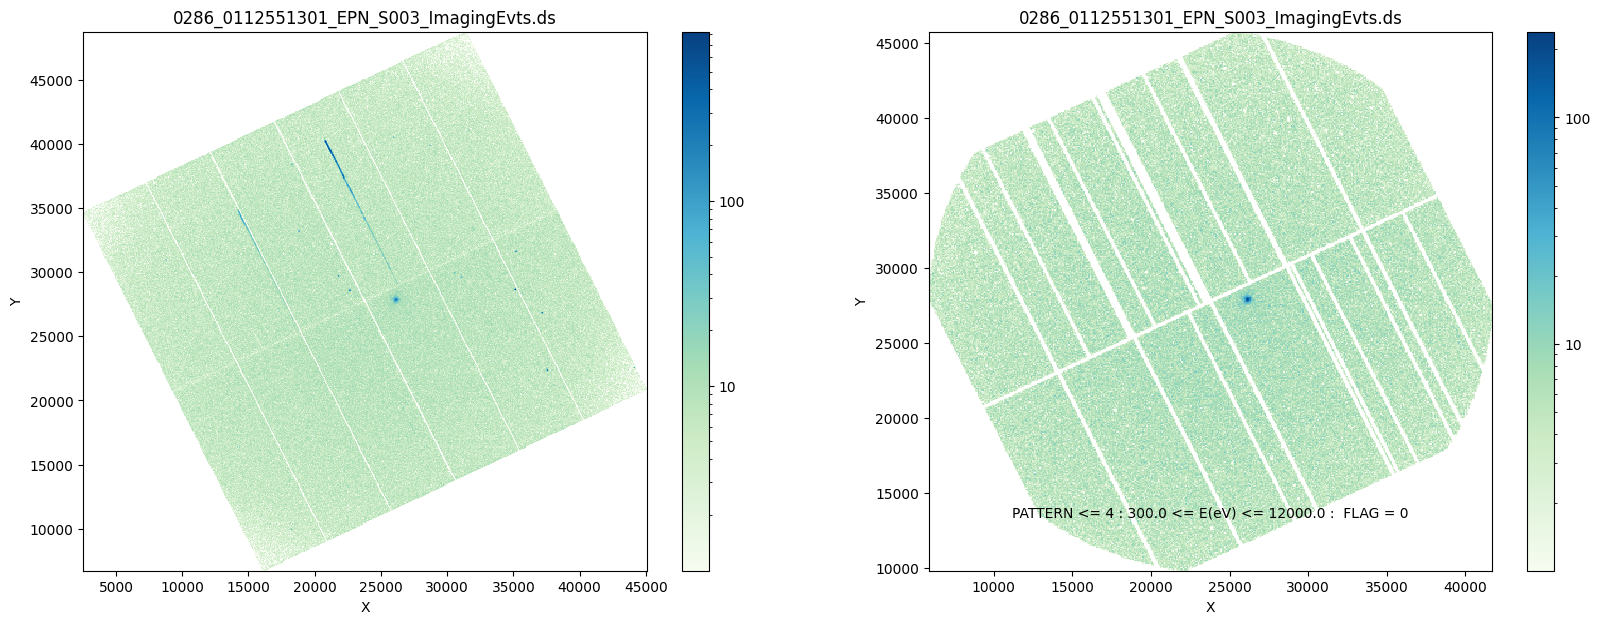

In [40]:
# Plot PN
for i in pnevt_list:
    plot_events(i, 'SKY', True, True, expression)

In [41]:
eventfile = work_dir + '/0286_0112551301_EPN_S003_ImagingEvts.ds'

In [46]:
pn_pattern   = 0        # pattern selection
pn_pi_min    = 10000.   # Low energy range eV
pn_pi_max    = 12000.   # High energy range eV
pn_threshold = 0.4      # cts/sec (only used here for display purposes)

out_LCFile   = work_dir+'/EPIC_pn_FlareBKGRate.fit'  # Name of the output BKG lightcurve

In [47]:
# SAS Command
cmd        = "evselect" # SAS task to be executed                  

# Arguments of SAS Command
expression = f'#XMMEA_EP&&(PI>={pn_pi_min}&&PI<={pn_pi_max})&&(PATTERN=={pn_pattern})'  # event filter expression
inargs     = [f'table={eventfile}','withrateset=Y',f'rateset={out_LCFile}','maketimecolumn=Y','timebinsize=100','makeratecolumn=Y',f'expression={expression}']

print("   Filter expression to use: "+expression+" \n")
print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   Filter expression to use: #XMMEA_EP&&(PI>=10000.0&&PI<=12000.0)&&(PATTERN==0) 

   SAS command to be executed: evselect, with arguments; 



['table=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds',
 'withrateset=Y',
 'rateset=/home/uverma/ngcxmm_data/EPIC_pn_FlareBKGRate.fit',
 'maketimecolumn=Y',
 'timebinsize=100',
 'makeratecolumn=Y',
 'expression=#XMMEA_EP&&(PI>=10000.0&&PI<=12000.0)&&(PATTERN==0)']

In [48]:
w(cmd,inargs).run()

Executing: 
evselect table='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PI>=10000.0&&PI<=12000.0)&&(PATTERN==0)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PHA' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrumset='no' spectrumset='spectrum.fits' spectralbinsize='5' with

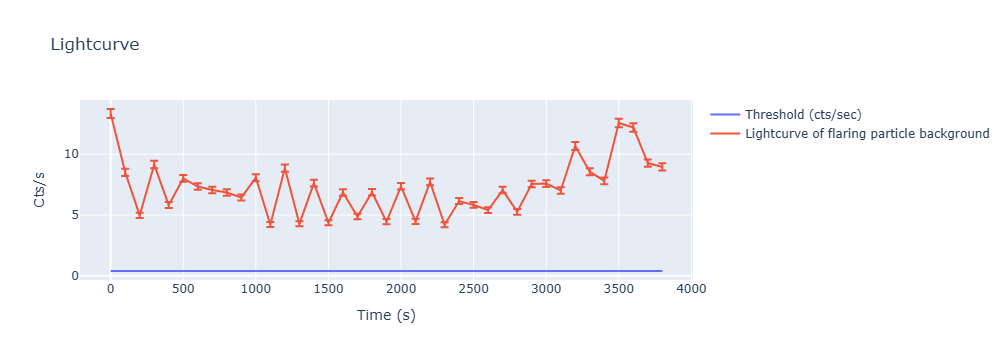

In [49]:
title = ["flaring particle background"]
fileNames = [out_LCFile]

# For more interactive plotting call the function to plot light curves (plotly version)
plotLC(fileNames, title, threshold=pn_threshold)

In [50]:
#filtering the lightcurve

pn_pattern   = 4        # pattern selection
pn_pi_min    = 200.     # Low energy range eV
pn_pi_max    = 10000.   # High energy range eV
pn_threshold = 0.4      # Cut to be applied to filter event file (cts/sec)

# Define the input and output file names

in_LCFile         = work_dir+'/EPIC_pn_FlareBKGRate.fit'   # Name of the output BKG lightcurve
out_gti_set       = work_dir+'/EPIC_pn_gti.fit'            # Name of the output file containing GTI intervals
out_clean_evtFile = work_dir+'/EPIC_pn_gtiFilteredEvts.ds' # Name of the output Event file filtered by GTI

In [51]:
# SAS Command
cmd        = "tabgtigen"

# Arguments of SAS Command
expression = 'RATE<='+str(pn_threshold)  # event filter expression
inargs     = [f'table={in_LCFile}',f'gtiset={out_gti_set}',f'expression={expression}']

print("   Filter expression to use: "+expression+" \n")
print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   Filter expression to use: RATE<=0.4 

   SAS command to be executed: tabgtigen, with arguments; 



['table=/home/uverma/ngcxmm_data/EPIC_pn_FlareBKGRate.fit',
 'gtiset=/home/uverma/ngcxmm_data/EPIC_pn_gti.fit',
 'expression=RATE<=0.4']

In [52]:
w(cmd,inargs).run()

Executing: 
tabgtigen table='/home/uverma/ngcxmm_data/EPIC_pn_FlareBKGRate.fit' gtiset='/home/uverma/ngcxmm_data/EPIC_pn_gti.fit' expression='RATE<=0.4' timecolumn='TIME' prefraction='0.5' postfraction='0.5' mingtisize='0.0' 
tabgtigen:- Executing (routine): tabgtigen table=/home/uverma/ngcxmm_data/EPIC_pn_FlareBKGRate.fit gtiset=/home/uverma/ngcxmm_data/EPIC_pn_gti.fit expression=RATE<=0.4 timecolumn=TIME prefraction=0.5 postfraction=0.5 mingtisize=0  -w 1 -V 4
tabgtigen:- tabgtigen (tabgtigen-2.13)  [xmmsas_20230412_1735-21.0.0] started:  2025-04-13T14:20:45.000
tabgtigen:- tabgtigen (tabgtigen-2.13)  [xmmsas_20230412_1735-21.0.0] ended:    2025-04-13T14:20:45.000


In [53]:
# SAS Command
cmd        = "evselect"

# Arguments of SAS Command
expression = ('#XMMEA_EP&&FLAG==0&&(PI>='+str(pn_pi_min)+'&&PI<='+str(pn_pi_max)+
              ')&&(gti('+str(out_gti_set)+',TIME))')
inargs     = [f'table={eventfile}','withfilteredset=Y',f'filteredset={out_clean_evtFile}',
              'destruct=Y','keepfilteroutput=T',f'expression={expression}']

print("   Filter expression to use: "+expression+" \n")
print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   Filter expression to use: #XMMEA_EP&&FLAG==0&&(PI>=200.0&&PI<=10000.0)&&(gti(/home/uverma/ngcxmm_data/EPIC_pn_gti.fit,TIME)) 

   SAS command to be executed: evselect, with arguments; 



['table=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds',
 'withfilteredset=Y',
 'filteredset=/home/uverma/ngcxmm_data/EPIC_pn_gtiFilteredEvts.ds',
 'destruct=Y',
 'keepfilteroutput=T',
 'expression=#XMMEA_EP&&FLAG==0&&(PI>=200.0&&PI<=10000.0)&&(gti(/home/uverma/ngcxmm_data/EPIC_pn_gti.fit,TIME))']

In [54]:
w(cmd,inargs).run()

Executing: 
evselect table='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' keepfilteroutput='T' withfilteredset='Y' filteredset='/home/uverma/ngcxmm_data/EPIC_pn_gtiFilteredEvts.ds' destruct='Y' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&FLAG==0&&(PI>=200.0&&PI<=10000.0)&&(gti(/home/uverma/ngcxmm_data/EPIC_pn_gti.fit,TIME))' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PHA' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecen

Events in event file /home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds: 1052152

Events in GTI clean event file /home/uverma/ngcxmm_data/EPIC_pn_gtiFilteredEvts.ds: 0



ValueError: zero-size array to reduction operation maximum which has no identity

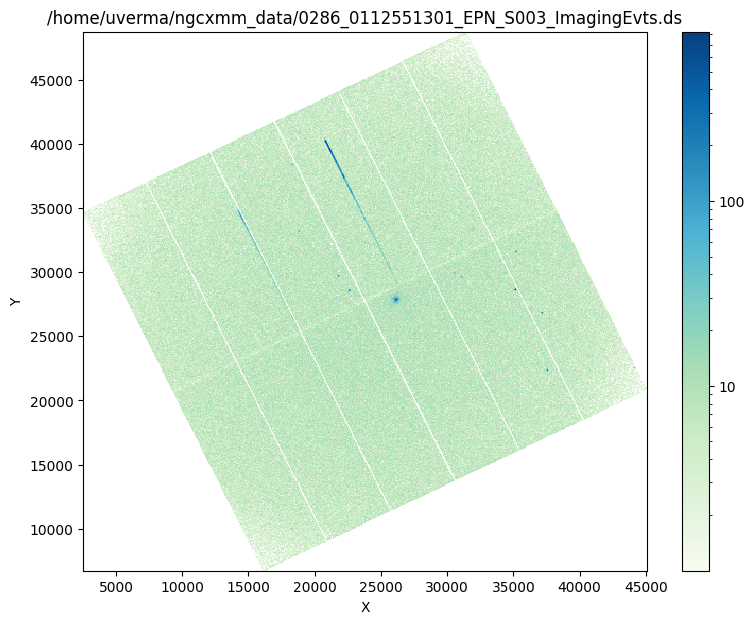

In [56]:
gti_filtered_image(eventfile, out_clean_evtFile, 'SKY', expression)

In [57]:
# Define some parameters to produce the image and the name of the output file

xbin=80     # xbin size
ybin=80     # ybin size
xcoord='X'  # coordinate system
ycoord='Y'  # coordinate system

out_IMFile   = work_dir+'EPIC_PN_Image.fit'  # Name of the output Image file 

In [58]:
# SAS Command
cmd        = "evselect" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'table={eventfile}','imagebinning=binSize',f'imageset={out_IMFile}','withimageset=yes',f'xcolumn={xcoord}',f'ycolumn={ycoord}',f'ximagebinsize={xbin}',f'yimagebinsize={ybin}']

print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   SAS command to be executed: evselect, with arguments; 



['table=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds',
 'imagebinning=binSize',
 'imageset=/home/uverma/ngcxmm_dataEPIC_PN_Image.fit',
 'withimageset=yes',
 'xcolumn=X',
 'ycolumn=Y',
 'ximagebinsize=80',
 'yimagebinsize=80']

In [60]:
w(cmd,inargs).run()

Executing: 
evselect table='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='true' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PHA' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='yes' imageset='/home/uverma/ngcxmm_dataEPIC_PN_Image.fit' xcolumn='X' ycolumn='Y' imagebinning='binSize' ximagebinsize='80' yimagebinsize='80' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrumset='no' spectrumset='spectrum.fits' spectralbinsize='5' withspecranges='no' specc

In [150]:
my_js9 = jpyjs9.JS9(width=600, height=700)

HTML(value="<iframe src='/datalabs/fa1bb4d4811186c7/js9/JS9-32a0' width=600 height=700></iframe>")

In [151]:
visualise(my_js9, out_IMFile, colormap='viridis')

In [65]:
result = getRegions(my_js9, filename="regions_data.json")

[{'mode': 'unselect', 'id': 1, 'shape': 'annulus', 'layer': 'regions', 'color': '#ff4d00', 'tags': ['back'], 'parent': None, 'child': None, 'x': 326.875901, 'y': 348.625042, 'lcs': {'x': 26110.572079999998, 'y': 27850.503360000002, 'sys': 'physical', 'radii': [832.0000000000084, 1664.0000000000168]}, 'imsys': 'physical', 'angle': 0, 'radii': [10.400000000000105, 20.80000000000021], 'imstr': 'annulus(26110.57,27850.50,832.00,1664.00)', 'rastr': '13:13:27.703', 'decstr': '+36:35:34.77', 'wcssys': 'FK5', 'ra': 198.36542916666667, 'dec': 36.59299166666667, 'wcsstr': 'annulus(13:13:27.703,+36:35:34.775,41.600000",83.200000")', 'wcsposstr': ['13:13:27.703', '+36:35:34.775'], 'wcssizestr': ['83.200000"'], 'wcsconfig': {'wcssys': 'FK5', 'rastr': '13:13:27.703', 'decstr': '+36:35:34.77', 'ra': 198.36542916666667, 'dec': 36.59299166666667, 'wcsstr': 'annulus(13:13:27.703,+36:35:34.775,41.600000",83.200000")', 'wcsposstr': ['13:13:27.703', '+36:35:34.775'], 'wcssizestr': ['83.200000"']}}, {'mode'

In [66]:
#pile up
# SAS Command
cmd        = "epatplot" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'set={eventfile}']

print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   SAS command to be executed: epatplot, with arguments; 



['set=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds']

In [67]:
w(cmd,inargs).run()

Executing: 
epatplot set='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' modifyinset='yes' sigma='3' withflag='yes' xaxisadu='no' device='/VCPS' outdir='./' useplotfile='no' plotfile='events_pat.ps' withqdp='no' withdetxy='no' withsrcxy='yes' withoutputmask='no' outmaskname='flag0_map_##.dat' withbackgroundset='no' backgroundset='bkg_events.fits' backscal='1.0' withusermode='no' usermode='0' withuserrawy='no' userrawy='190' ccdlimits='1 64 1 200 1 12' plotxrange='0.0 0.0' plotyrange='0.0 0.0' pileupnumberenergyrange='500 2000' 
epatplot:- Executing (routine): epatplot set=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds modifyinset=yes sigma=3 withflag=yes xaxisadu=no device=/VCPS outdir=./ plotfile=events_pat.ps useplotfile=no withqdp=no withdetxy=no withsrcxy=yes outmaskname=flag0_map_##.dat withoutputmask=no backgroundset=bkg_events.fits withbackgroundset=no backscal=1 usermode=0 withusermode=no userrawy=190 withuserrawy=no ccdlimits='1 64 1 200 1 

In [68]:
# Extract the source region lightcurve

# Define some parameters for filtering the event file and define the lightcurve binning

q_flag       = "#XMMEA_EP" # Quality flag for EPIC pn
n_pattern    = 4           # Pattern selection
pn_pi_min    = 300.        # Low energy range eV
pn_pi_max    = 10000.      # High energy range eV
lc_bin       = 100         # Lightcurve bin in secs
x_source     = result['x_source']
y_source     = result['y_source']
r_source     = result['r_source']

# Define the output ligthcurve file name

in_LCSRCFile = work_dir+'/EPIC_PN_source_lightcurve.lc'   # Name of the output source lightcurve

In [69]:
# SAS Command
cmd        = "evselect" # SAS task to be executed                  

# Arguments of SAS Command
expression = f'{q_flag}&&(PATTERN<={n_pattern})&&((X,Y) IN circle({x_source},{y_source},{r_source}))&&(PI in [{pn_pi_min}:{pn_pi_max}])'  # event filter expression
inargs     = [f'table={eventfile}','energycolumn=PI','withrateset=yes',f'rateset={in_LCSRCFile}',
              f'timebinsize={lc_bin}','maketimecolumn=yes','makeratecolumn=yes',f'expression={expression}']

print("   Filter expression to use: "+expression+" \n")
print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   Filter expression to use: #XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(26150.50,27830.50,314.62))&&(PI in [300.0:10000.0]) 

   SAS command to be executed: evselect, with arguments; 



['table=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds',
 'energycolumn=PI',
 'withrateset=yes',
 'rateset=/home/uverma/ngcxmm_data/EPIC_PN_source_lightcurve.lc',
 'timebinsize=100',
 'maketimecolumn=yes',
 'makeratecolumn=yes',
 'expression=#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(26150.50,27830.50,314.62))&&(PI in [300.0:10000.0])']

In [70]:
w(cmd,inargs).run()

Executing: 
evselect table='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(26150.50,27830.50,314.62))&&(PI in [300.0:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrumset='no' spectrumset

In [71]:
# Generic helper function to convert the XMM-Newton light curve file into a generic 'LightCurve' object
xmm_lightcurve_source = read_lightcurve(in_LCSRCFile)

In [74]:
lcviz([xmm_lightcurve_source], labels=['Source'])

Application(config='lcviz', docs_link='https://lcviz.readthedocs.io', events=['call_viewer_method', 'change_re…

In [87]:
seconds = 0.044 * 24 * 60 * 60
print(f'{seconds} s')

3801.6 s


In [88]:
with fits.open(eventfile) as hdul:
    header = hdul[1].header 
    obs_start = header.get("TSTART")
    obs_end = header.get("TSTOP")
    print(f"TIME-OBS: {obs_start}")
    print(f"TIME-END: {obs_end}")

TIME-OBS: 110482791.092752
TIME-END: 110486656.477165


In [89]:

time_max = obs_start + seconds
time_min = obs_start
print(time_max)
print(time_min)

110486592.69275199
110482791.092752


In [90]:
# SAS Command
cmd        = "evselect" # SAS task to be executed                  

# Arguments of SAS Command
expression = f'{q_flag}&&(PATTERN<={n_pattern})&&((X,Y) IN circle({x_source},{y_source},{r_source}))&&(PI in [{pn_pi_min}:{pn_pi_max}])'  # event filter expression
inargs     = [f'table={eventfile}','energycolumn=PI','withrateset=yes',f'rateset={in_LCSRCFile}',
              f'timebinsize={lc_bin}','maketimecolumn=yes','makeratecolumn=yes',f'expression={expression}',f'timemax={time_max}', f'timemin={time_min}']

print("   Filter expression to use: "+expression+" \n")
print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   Filter expression to use: #XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(26150.50,27830.50,314.62))&&(PI in [300.0:10000.0]) 

   SAS command to be executed: evselect, with arguments; 



['table=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds',
 'energycolumn=PI',
 'withrateset=yes',
 'rateset=/home/uverma/ngcxmm_data/EPIC_PN_source_lightcurve.lc',
 'timebinsize=100',
 'maketimecolumn=yes',
 'makeratecolumn=yes',
 'expression=#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(26150.50,27830.50,314.62))&&(PI in [300.0:10000.0])',
 'timemax=110486592.69275199',
 'timemin=110482791.092752']

In [91]:
w(cmd,inargs).run()

Executing: 
evselect table='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(26150.50,27830.50,314.62))&&(PI in [300.0:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrumset='no' spectrumset

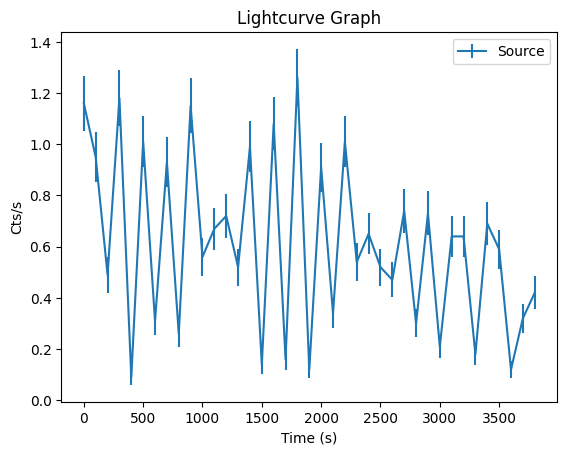

In [92]:
plotLCmatplotlib(fileNames=[in_LCSRCFile], names=['Source'], title='Lightcurve Graph', 
                 threshold=None, xlim=None, ylim=None) 

In [93]:
# Extract the background region light curve

# Define some parameters for filtering the event file and define the lightcurve binning

q_flag       = "#XMMEA_EP" # Quality flag for EPIC pn
n_pattern    = 4           # Pattern selection
pn_pi_min    = 300.        # Low energy range eV
pn_pi_max    = 10000.      # High energy range eV
lc_bin       = 100         # Lightcurve bin in secs
time_max     = obs_start + seconds
time_min     = obs_start
x_bkg        = result['x_bkg']
y_bkg        = result['y_bkg']
r_bkg        = result['r_bkg']
r2_bkg       = result['r2_bkg']
# Define the output ligthcurve file name

in_LCBKGFile = work_dir+'/EPIC_PN_background_lightcurve.lc'   # Name of the output background lightcurve

In [94]:
# SAS Command
cmd        = "evselect" # SAS task to be executed                  

# Arguments of SAS Command
expression = f'{q_flag}&&(PATTERN<={n_pattern})&&((X,Y) IN annulus({x_bkg},{y_bkg},{r_bkg},{r2_bkg}))&&(PI in [{pn_pi_min}:{pn_pi_max}])'  # event filter expression
inargs     = [f'table={eventfile}','energycolumn=PI','withrateset=yes',f'rateset={in_LCBKGFile}',
              f'timebinsize={lc_bin}','maketimecolumn=yes','makeratecolumn=yes',f'expression={expression}',f'timemax={time_max}', f'timemin={time_min}']

print("   Filter expression to use: "+expression+" \n")
print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   Filter expression to use: #XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN annulus(26110.57,27850.50,832.00,1664.00))&&(PI in [300.0:10000.0]) 

   SAS command to be executed: evselect, with arguments; 



['table=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds',
 'energycolumn=PI',
 'withrateset=yes',
 'rateset=/home/uverma/ngcxmm_data/EPIC_PN_background_lightcurve.lc',
 'timebinsize=100',
 'maketimecolumn=yes',
 'makeratecolumn=yes',
 'expression=#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN annulus(26110.57,27850.50,832.00,1664.00))&&(PI in [300.0:10000.0])',
 'timemax=110486592.69275199',
 'timemin=110482791.092752']

In [95]:
w(cmd,inargs).run()

Executing: 
evselect table='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN annulus(26110.57,27850.50,832.00,1664.00))&&(PI in [300.0:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrumset='no' sp

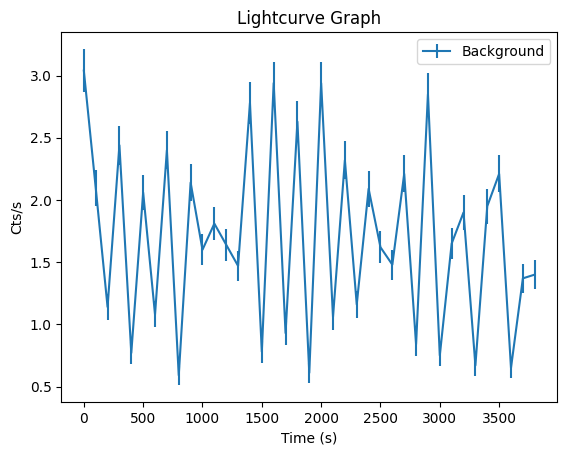

In [96]:
plotLCmatplotlib(fileNames=[in_LCBKGFile], names=['Background'], title='Lightcurve Graph', 
                 threshold=None, xlim=None, ylim=None)

In [97]:
# Define the output corrected ligthcurve file name

in_LCFile = work_dir+'/EPIC_PN_corrected_lightcurve.lc'   # Name of the output corrected lightcurve

In [98]:
# Correct the light curve with the SAS task epiclccorr

# SAS Command
cmd        = "epiclccorr" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'eventlist={eventfile}',f'srctslist={in_LCSRCFile}',f'outset={in_LCFile}',
              f'bkgtslist={in_LCBKGFile}','withbkgset=yes','applyabsolutecorrections=no']

print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   SAS command to be executed: epiclccorr, with arguments; 



['eventlist=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds',
 'srctslist=/home/uverma/ngcxmm_data/EPIC_PN_source_lightcurve.lc',
 'outset=/home/uverma/ngcxmm_data/EPIC_PN_corrected_lightcurve.lc',
 'bkgtslist=/home/uverma/ngcxmm_data/EPIC_PN_background_lightcurve.lc',
 'withbkgset=yes',
 'applyabsolutecorrections=no']

In [99]:
w(cmd,inargs).run()

Executing: 
epiclccorr srctslist='/home/uverma/ngcxmm_data/EPIC_PN_source_lightcurve.lc' eventlist='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' outset='/home/uverma/ngcxmm_data/EPIC_PN_corrected_lightcurve.lc' withbkgset='yes' bkgtslist='/home/uverma/ngcxmm_data/EPIC_PN_background_lightcurve.lc' applyabsolutecorrections='no' withdetbins='no' detxbins='5' detybins='5' withsourcepos='no' sourcecoords='eqpos' sourcex='0' sourcey='0' allcamera='no' 
epiclccorr:- Executing (routine): epiclccorr srctslist=/home/uverma/ngcxmm_data/EPIC_PN_source_lightcurve.lc eventlist=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds outset=/home/uverma/ngcxmm_data/EPIC_PN_corrected_lightcurve.lc bkgtslist=/home/uverma/ngcxmm_data/EPIC_PN_background_lightcurve.lc withbkgset=yes detxbins=5 detybins=5 withdetbins=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no applyabsolutecorrections=no allcamera=no  -w 1 -V 4
epiclccorr:- epiclccorr (epiclccorr-1.23.1)  [xmmsas

In [100]:
fileNames = [in_LCSRCFile, in_LCBKGFile, in_LCFile]
names     = ['Source', 'Background', 'Net']

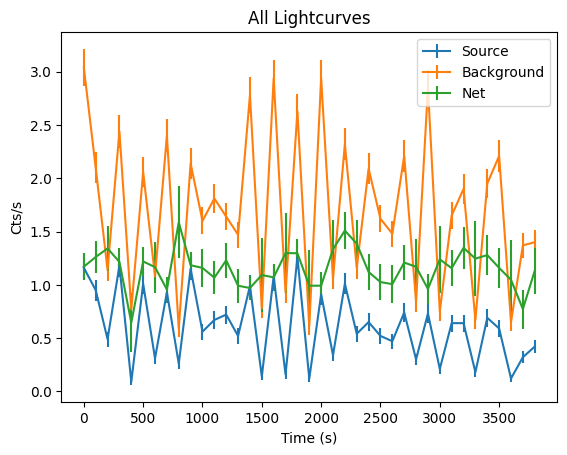

In [101]:
plotLCmatplotlib(fileNames, names, title='All Lightcurves')

Spectrum

In [103]:
# Extract the source region spectrum

# Define some parameters for filtering the event file

q_flag       = "#XMMEA_EP" # Quality flag for EPIC pn
n_pattern    = 4           # Pattern selection

# Define the output ligthcurve file name

in_SPSRCFile = work_dir+'/EPIC_PN_source_spectrum.fits'   # Name of the output source spectrum

In [104]:
# SAS Command
cmd        = "evselect" # SAS task to be executed                  

# Arguments of SAS Command
expression = f'{q_flag}&&(PATTERN<={n_pattern})&&((X,Y) IN circle({x_source},{y_source},{r_source}))'  # event filter expression
inargs     = [f'table={eventfile}','withspectrumset=yes',f'spectrumset={in_SPSRCFile}',
              'energycolumn=PI','spectralbinsize=5','withspecranges=yes','specchannelmin=0',
              'specchannelmax=20479',f'expression={expression}']
print("   Filter expression to use: "+expression+" \n")
print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   Filter expression to use: #XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(26150.50,27830.50,314.62)) 

   SAS command to be executed: evselect, with arguments; 



['table=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds',
 'withspectrumset=yes',
 'spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits',
 'energycolumn=PI',
 'spectralbinsize=5',
 'withspecranges=yes',
 'specchannelmin=0',
 'specchannelmax=20479',
 'expression=#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(26150.50,27830.50,314.62))']

In [107]:
w(cmd,inargs).run()

Executing: 
evselect table='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN circle(26150.50,27830.50,314.62))' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrumset='yes' spectrumset='/home/uverma/ngcxmm_da

In [108]:
# Extract the background region spectrum

# Define some parameters for filtering the event file

q_flag       = "#XMMEA_EP" # Quality flag for EPIC pn
n_pattern    = 4           # Pattern selection

# Define the output ligthcurve file name

in_SPBKGFile = work_dir+'/EPIC_PN_background_spectrum.fits'   # Name of the output background spectrum

In [109]:
# SAS Command
cmd        = "evselect" # SAS task to be executed                  

# Arguments of SAS Command
expression = f'{q_flag}&&(PATTERN<={n_pattern})&&((X,Y) IN annulus({x_bkg},{y_bkg},{r_bkg},{r2_bkg}))'  # event filter expression
inargs     = [f'table={eventfile}','withspectrumset=yes',f'spectrumset={in_SPBKGFile}',
              'energycolumn=PI','spectralbinsize=5','withspecranges=yes','specchannelmin=0',
              'specchannelmax=20479',f'expression={expression}']
print("   Filter expression to use: "+expression+" \n")
print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   Filter expression to use: #XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN annulus(26110.57,27850.50,832.00,1664.00)) 

   SAS command to be executed: evselect, with arguments; 



['table=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds',
 'withspectrumset=yes',
 'spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_background_spectrum.fits',
 'energycolumn=PI',
 'spectralbinsize=5',
 'withspecranges=yes',
 'specchannelmin=0',
 'specchannelmax=20479',
 'expression=#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN annulus(26110.57,27850.50,832.00,1664.00))']

In [110]:
w(cmd,inargs).run()

Executing: 
evselect table='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EP&&(PATTERN<=4)&&((X,Y) IN annulus(26110.57,27850.50,832.00,1664.00))' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrumset='yes' spectrumset='/home/uverma/

In [111]:
# SAS Command
cmd        = "backscale" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'spectrumset={in_SPSRCFile}',f'badpixlocation={eventfile}']

print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   SAS command to be executed: backscale, with arguments; 



['spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits',
 'badpixlocation=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds']

In [112]:
w(cmd,inargs).run()

Executing: 
backscale spectrumset='/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits' badpixlocation='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' withbadpixcorr='yes' useodfatt='no' ignoreoutoffov='yes' withbadpixres='no' badpixelresolution='2' 
backscale:- Executing (routine): backscale spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits badpixlocation=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds withbadpixcorr=yes useodfatt=no ignoreoutoffov=yes badpixelresolution=2 withbadpixres=no  -w 1 -V 4
backscale:- backscale (backscale-1.6)  [xmmsas_20230412_1735-21.0.0] started:  2025-04-13T14:57:24.000
backscale:- Executing (routine): arfgen spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits rmfset=response.ds withrmfset=no arfset=deletearf.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=1 detybins=1 withdetbins=yes psfenergy=2 filterdss=yes filteredset=filteredp

In [113]:
# SAS Command
cmd        = "backscale" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'spectrumset={in_SPBKGFile}',f'badpixlocation={eventfile}']

print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   SAS command to be executed: backscale, with arguments; 



['spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_background_spectrum.fits',
 'badpixlocation=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds']

In [114]:
w(cmd,inargs).run()

Executing: 
backscale spectrumset='/home/uverma/ngcxmm_data/EPIC_PN_background_spectrum.fits' badpixlocation='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' withbadpixcorr='yes' useodfatt='no' ignoreoutoffov='yes' withbadpixres='no' badpixelresolution='2' 
backscale:- Executing (routine): backscale spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_background_spectrum.fits badpixlocation=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds withbadpixcorr=yes useodfatt=no ignoreoutoffov=yes badpixelresolution=2 withbadpixres=no  -w 1 -V 4
backscale:- backscale (backscale-1.6)  [xmmsas_20230412_1735-21.0.0] started:  2025-04-13T14:58:08.000
backscale:- Executing (routine): arfgen spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_background_spectrum.fits rmfset=response.ds withrmfset=no arfset=deletearf.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=1 detybins=1 withdetbins=yes psfenergy=2 filterdss=yes filtereds

In [115]:
in_RESPFile = work_dir+'/EPIC_PN.rmf'   # Name of the output redistribution

In [116]:
# SAS Command
cmd        = "rmfgen" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'spectrumset={in_SPSRCFile}',f'rmfset={in_RESPFile}']

print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   SAS command to be executed: rmfgen, with arguments; 



['spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits',
 'rmfset=/home/uverma/ngcxmm_data/EPIC_PN.rmf']

In [117]:
w(cmd,inargs).run()

Executing: 
rmfgen rmfset='/home/uverma/ngcxmm_data/EPIC_PN.rmf' threshold='1e-06' withenergybins='no' energymin='0' energymax='15' nenergybins='30' spectrumset='/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits' format='var' detmaptype='psf' detmaparray='detmapfile.ds:' withdetbounds='no' detxoffset='1200' detyoffset='1200' withdetbins='yes' detxbins='160' detybins='160' correctforpileup='no' raweventfile='rawevents.ds' filterdss='yes' withfilteredset='no' filteredset='filteredpixellist.ds' withrmfset='no' psfenergy='2' withsourcepos='no' sourcecoords='eqpos' sourcex='0' sourcey='0' extendedsource='no' modeleffarea='no' modelquantumeff='no' modelfiltertrans='no' modelcontamination='no' modelee='yes' modelootcorr='no' eegridfactor='100' withbadpixcorr='no' badpixlocation='notSpecified' setbackscale='no' keeparfset='yes' useodfatt='no' ignoreoutoffov='yes' crossregionarf='no' crossreg_spectrumset='' psfmodel='notSpecified' withbadpixres='no' badpixelresolution='2' applyxcaladjustmen

In [118]:
in_ARFFile = work_dir+'/EPIC_PN.arf'  

In [119]:
# SAS Command
cmd        = "arfgen" # SAS task to be executed                  

print("   Checking for Response File ..... \n")
# Check if RESP file is available.
if os.path.isfile(in_RESPFile):
    print ("File "+in_RESPFile+" exists. \n")
else:
    print ("File "+in_RESPFile+" does not exist, please check. \n")

# Arguments of SAS Command
inargs     = [f'spectrumset={in_SPSRCFile}',f'arfset={in_ARFFile}',
              'withrmfset=yes',f'rmfset={in_RESPFile}',f'badpixlocation={eventfile}','detmaptype=psf']

print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   Checking for Response File ..... 

File /home/uverma/ngcxmm_data/EPIC_PN.rmf exists. 

   SAS command to be executed: arfgen, with arguments; 



['spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits',
 'arfset=/home/uverma/ngcxmm_data/EPIC_PN.arf',
 'withrmfset=yes',
 'rmfset=/home/uverma/ngcxmm_data/EPIC_PN.rmf',
 'badpixlocation=/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds',
 'detmaptype=psf']

In [120]:
w(cmd,inargs).run()

Executing: 
arfgen spectrumset='/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits' withrmfset='yes' rmfset='/home/uverma/ngcxmm_data/EPIC_PN.rmf' arfset='/home/uverma/ngcxmm_data/EPIC_PN.arf' detmaptype='psf' detmaparray='detmapfile.ds:' withdetbounds='no' detxoffset='1200' detyoffset='1200' withdetbins='no' detxbins='5' detybins='5' psfenergy='2' filterdss='yes' withfilteredset='no' filteredset='filteredpixellist.ds' withsourcepos='no' sourcecoords='eqpos' sourcex='0' sourcey='0' extendedsource='no' modeleffarea='yes' modelquantumeff='yes' modelfiltertrans='yes' modelcontamination='yes' modelee='yes' modelootcorr='yes' applyxcaladjustment='no' applyabsfluxcorr='no' eegridfactor='100' withbadpixcorr='yes' badpixlocation='/home/uverma/ngcxmm_data/0286_0112551301_EPN_S003_ImagingEvts.ds' psfmodel='ELLBETA' withbadpixres='no' badpixelresolution='2' badpixmaptype='flat' setbackscale='no' keeparfset='yes' useodfatt='no' ignoreoutoffov='yes' crossregionarf='no' crossreg_spectrumset='' 
a

Rebin spectra and link associated files

In [121]:
in_GRPFile = work_dir+'/EPIC_PN_spectrum_grp.fits'

In [122]:
# SAS Command
cmd        = "specgroup" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'spectrumset={in_SPSRCFile}','mincounts=25','oversample=3',
              f'rmfset={in_RESPFile}',f'arfset={in_ARFFile}',
              f'backgndset={in_SPBKGFile}',f'groupedset={in_GRPFile}']

print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   SAS command to be executed: specgroup, with arguments; 



['spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits',
 'mincounts=25',
 'oversample=3',
 'rmfset=/home/uverma/ngcxmm_data/EPIC_PN.rmf',
 'arfset=/home/uverma/ngcxmm_data/EPIC_PN.arf',
 'backgndset=/home/uverma/ngcxmm_data/EPIC_PN_background_spectrum.fits',
 'groupedset=/home/uverma/ngcxmm_data/EPIC_PN_spectrum_grp.fits']

In [123]:
w(cmd,inargs).run()

Executing: 
specgroup spectrumset='/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits' overwrite='no' groupedset='/home/uverma/ngcxmm_data/EPIC_PN_spectrum_grp.fits' withbgdset='yes' backgndset='/home/uverma/ngcxmm_data/EPIC_PN_background_spectrum.fits' withCounts='yes' mincounts='25' withminSN='no' minSN='5' withratioabovebgnd='no' ratioabovebgnd='' withoversampling='yes' oversample='3' withtemplate='no' grouptemplate='grptemplate.ds' withranges='no' ranges='' withRegularBins='no' regbinstart='' regbinend='' regbinwid='' units='CHAN' withrmfset='yes' rmfset='/home/uverma/ngcxmm_data/EPIC_PN.rmf' witharfset='yes' arfset='/home/uverma/ngcxmm_data/EPIC_PN.arf' addfilenames='yes' hightolow='no' lastbin='addtogroup' setbad='CCF' 
specgroup:- Executing (routine): specgroup spectrumset=/home/uverma/ngcxmm_data/EPIC_PN_source_spectrum.fits groupedset=/home/uverma/ngcxmm_data/EPIC_PN_spectrum_grp.fits overwrite=no backgndset=/home/uverma/ngcxmm_data/EPIC_PN_background_spectrum.fits withbgds

'Visualise the Spectrum using Xspec '

In [124]:
AllModels.clear()
AllData.clear()

In [125]:
data1 = Spectrum(in_GRPFile)  # load spectra groupped file
AllData.show()        


1 spectrum  in use
 
Spectral Data File: /home/uverma/ngcxmm_data/EPIC_PN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.274e+00 +/- 2.947e-02 (84.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-67
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1760 sec
 Using fit statistic: chi
 Using Background File                /home/uverma/ngcxmm_data/EPIC_PN_background_spectrum.fits
  Background Exposure Time: 1717 sec
 Using Response (RMF) File            /home/uverma/ngcxmm_data/EPIC_PN.rmf for Source 1
 Using Auxiliary Response (ARF) File  /home/uverma/ngcxmm_data/EPIC_PN.arf


1 file 1 spectrum 
Spectrum 1  Spectral Data File: /home/uverma/ngcxmm_data/EPIC_PN_spectrum_grp.fits
Net count rate (cts/s) for Spectrum:1  1.274e+00 +/- 2.947e-02 (84.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-67
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1760 sec
 Using fit statistic:

In [126]:
Plot.device = "/null"

In [127]:

Plot.xAxis = "keV"        # Set X axis to energy units
Plot.xLog  = True         # Log scale
Plot.yLog  = True
Plot("data")  

In [128]:
# Extract data from the XSPEC plot

energies = Plot.x()    # X-axis values
edeltas = Plot.xErr()  # X-axis error values
rates = Plot.y()       # Y-axis values
errors = Plot.yErr()   # Y-axis error values
labels = Plot.labels()

<ErrorbarContainer object of 3 artists>

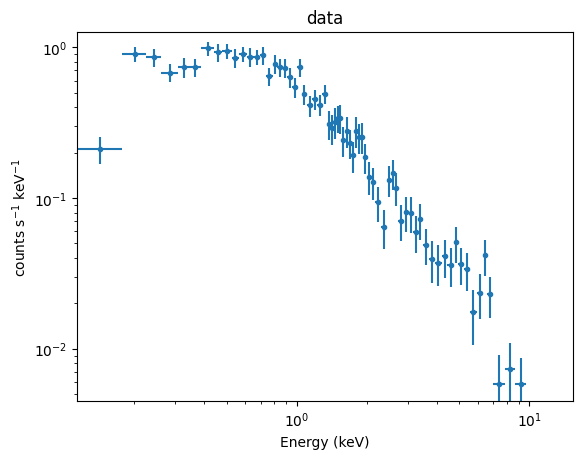

In [129]:
# Customize the plot appearance
plt.xscale('log')
plt.yscale('log')
plt.xlabel(labels[0])
plt.ylabel(labels[1])
plt.title(labels[2])

# Plot your spectrum with error bars
plt.errorbar(energies,rates,xerr=edeltas,yerr=errors,fmt='.')

In [130]:
model1 = Model("phabs * powerlaw")


Model phabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.680260e+09     using 67 bins.

Test statistic : Chi-Squared              3.680260e+09     using 67 bins.
 Null hypothesis probability of 0.000000e+00 with 64 degrees of freedom
 Current data and model not fit yet.


In [131]:

model1.setPars({1:0.02, 2:2.0})
model1.show()


Fit statistic  : Chi-Squared              5.551084e+09     using 67 bins.

Test statistic : Chi-Squared              5.551084e+09     using 67 bins.
 Null hypothesis probability of 0.000000e+00 with 64 degrees of freedom
 Current data and model not fit yet.

Model phabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   phabs      nH         10^22    2.00000E-02  +/-  0.0          
   2    2   powerlaw   PhoIndex            2.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________



In [132]:
Xset.chatter
# Fit model

data1.ignore("**-0.3 10.-**") # For the fit, ignore the range ourside (0.3-10.)

Fit.nIterations = 100         # maximum number of iterations during fitting
Fit.statMethod  = "cstat"     # fit statistics to be used
Fit.perform()                 # perform fit
cl              = 2.706       # confidence level (90%)
Fit.error(str(cl)+" 1 2 3")   # derive errors at given confidence range for all parameters

fene_ini = 0.3                # Initial energy to derive flux (keV)
fene_end = 10.                # End energy to derive flux (keV)
AllModels.calcFlux(str(fene_ini)+" "+str(fene_end)+" err")  # derive the flux and error in the 0.2-10 keV energy range according to fitted model

     4 channels (1-4) ignored in spectrum #     1
     1 channels (67) ignored in spectrum #     1

Fit statistic  : Chi-Squared              3.410889e+09     using 62 bins.

Test statistic : Chi-Squared              3.410889e+09     using 62 bins.
 Null hypothesis probability of 0.000000e+00 with 59 degrees of freedom
 Current data and model not fit yet.

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic              5.374399e+06     using 62 bins.

Test statistic : Chi-Squared              3.410889e+09     using 62 bins.
 Null hypothesis probability of 0.000000e+00 with 59 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
5477.73      3.78754e+06   0       71.4464       9.25144      0.118310
5477.42      0.0453998     3       50.9194       8.83400      0.228781
5471.96      0.263

***Warning: Parameter pegged at hard limit: 0


In [133]:
# Extract information from fitted model

nh       = model1(1).values[1]         # Model parameter 1
nherr    = AllModels(1)(1).error       # Error model parameter 1
alpha    = model1(2).values[0]         # Model parameter 2
alphaerr = AllModels(1)(2).error       # Error model parameter 2
norm     = model1(3).values[0]         # Model parameter 3
normerr  = AllModels(1)(3).error       # Error model parameter 3

dof      = Fit.dof                     # get fit dof
statv    = Fit.statMethod              # fit statistics method
stat     = Fit.statistic               # get value of fit statistics
tstatv   = Fit.statTest                # test statistics method
tstat    = Fit.testStatistic           # get value of test statistics
flux     = data1.flux                  # get flux

print(" Fit Statistics: \n")
print("   Value of fit stat: "+str(stat)+" ("+statv+")\n")
print("   Value of test stat: "+str(tstat)+" ("+tstatv+"\n")
print("   Fit dof: "+str(dof)+"\n")
print(" Model Parameters and their error: \n")
print("   Nh Value (10^22) : "+str(100.*nh)+" , "+str(nherr)+"\n")
print("   Alpha Value: "+str(alpha)+" , "+str(alphaerr)+"\n")
print("   Norm Value: "+str(norm)+" , "+str(normerr)+"\n")
print("   Flux Value ("+ str(fene_ini)+"-"+str(fene_end)+" keV) (ergs/cm^2/s): "+str(flux[0])+" , "+"("+str(flux[1])+", "+str(flux[2])+")\n")

 Fit Statistics: 

   Value of fit stat: 56.45314364117439 (cstat)

   Value of test stat: 55.43696695175536 (chi

   Fit dof: 59

 Model Parameters and their error: 

   Nh Value (10^22) : 0.006785344531025053 , (0.0, 0.027647385986978145, 'FFFTFFTFF')

   Alpha Value: 1.6461312126454244 , (1.5552307357817203, 1.7564712603103292, 'FTFFFFFFF')

   Norm Value: 0.0006884044386541931 , (0.0006460766079882955, 0.0007566438524442925, 'FFFFFFFFF')

   Flux Value (0.3-10.0 keV) (ergs/cm^2/s): 4.934793634132847e-12 , (4.717889030262159e-12, 5.141062602053831e-12)



In [135]:
Plot.device="/null"

In [136]:
# Plot data and folded model 

Plot.xAxis = "keV"        # Set X axis to energy units
Plot.xLog  = True         # Log scale
Plot.yLog  = True         # Log scale
Plot("ldata chi")         # Plot data and folded model

Note: When using cstat or lstat, "plot chisq" is only valid
      for data sets with no background files.


In [137]:
# Define parameters

energies = Plot.x()
edeltas = Plot.xErr()
rates = Plot.y(1,1)
errors = Plot.yErr(1,1)
foldedmodel = Plot.model()
dataLabels = Plot.labels(1)
chiLabels = Plot.labels(2)

In [138]:
nE = len(energies)
stepenergies = list()

for i in range(nE):
    stepenergies.append(energies[i] - edeltas[i])
stepenergies.append(energies[-1]+edeltas[-1])
foldedmodel.append(foldedmodel[-1])

chi = Plot.y(1,2)
chi.append(chi[-1])

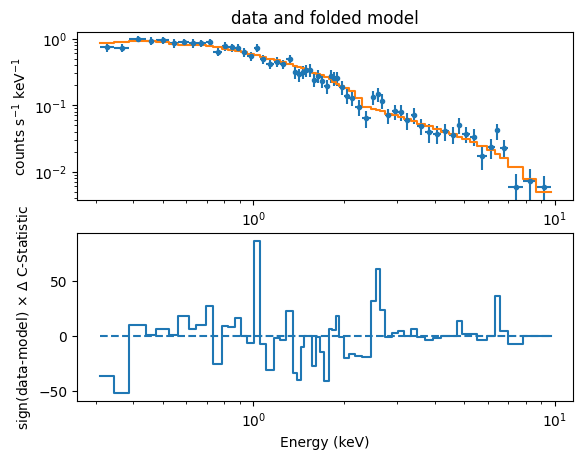

In [139]:
# Customise and plot the results

# First subplot
plt.subplot(211)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(dataLabels[1])
plt.title(dataLabels[2])
plt.errorbar(energies,rates,xerr=edeltas,yerr=errors,fmt='.')
plt.step(stepenergies,foldedmodel,where='post')

# Second subplot
plt.subplot(212)
plt.xscale('log')
plt.xlabel(chiLabels[0])
plt.ylabel(chiLabels[1])
plt.step(stepenergies,chi,where='post')
plt.hlines(0.0,stepenergies[0],stepenergies[-1],linestyles='dashed')